# Ejercicio introductorio

Una universidad desea analizar la evolución de su población estudiantil a lo largo del tiempo. Sabe que cada año ingresan nuevos estudiantes, pero también ocurre un fenómeno de deserción que depende del tamaño actual de la población. En algunos casos, los estudiantes se gradúan después de un periodo fijo, y en otros, los ingresos no logran compensar la salida de estudiantes.

Se desea modelar esta dinámica usando ecuaciones diferenciales y explorar diversos escenarios para prever el comportamiento de la población en el futuro. A partir de este contexto, se desarrollan los siguientes escenarios de modelado.


In [1]:
# Proyecto: Dinámica de una Población Universitaria
# Análisis mediante ecuaciones diferenciales
# Objetivo general:
# Estudiar la evolución de una población universitaria a través de distintos escenarios usando
# ecuaciones diferenciales analíticas, numéricas y gráficas. El enfoque principal es observar
# si la población crece o decrece, encontrar los valores límites y realizar interpretaciones.

# Bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import sympy as sp

In [2]:
# Parámetros generales (pueden adaptarse a la matrícula del estudiante)
m, n = 9, 6  # los dos dígitos más grandes y distintos de la matrícula
a = m / n
b = 1 / n

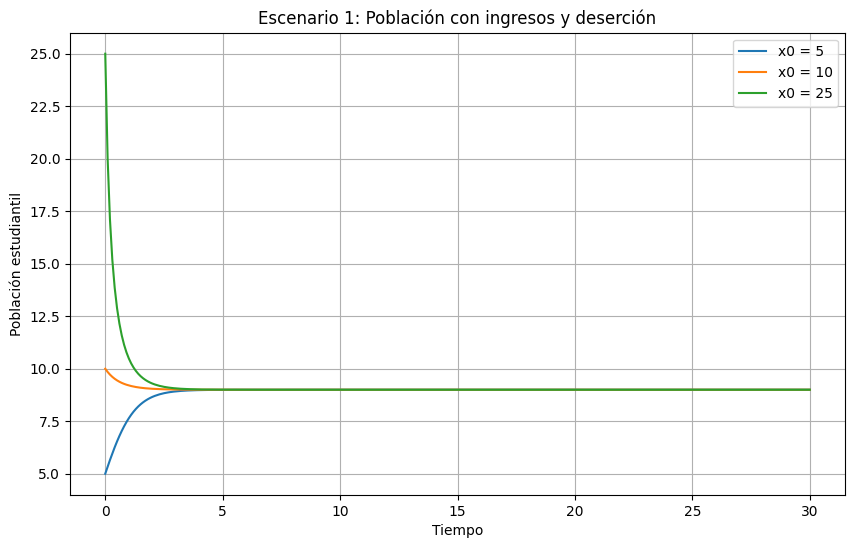

In [3]:
# =========================
# Escenario 1: Ingresos y deserción
# =========================
def modelo_logistico(x, t, a, b):
    return a * x - b * x**2

x0 = [5, 10, 25]  # condiciones iniciales
t = np.linspace(0, 30, 300)

plt.figure(figsize=(10,6))
for xi in x0:
    sol = odeint(modelo_logistico, xi, t, args=(a, b))
    plt.plot(t, sol, label=f"x0 = {xi}")

plt.title("Escenario 1: Población con ingresos y deserción")
plt.xlabel("Tiempo")
plt.ylabel("Población estudiantil")
plt.legend()
plt.grid(True)
plt.show()

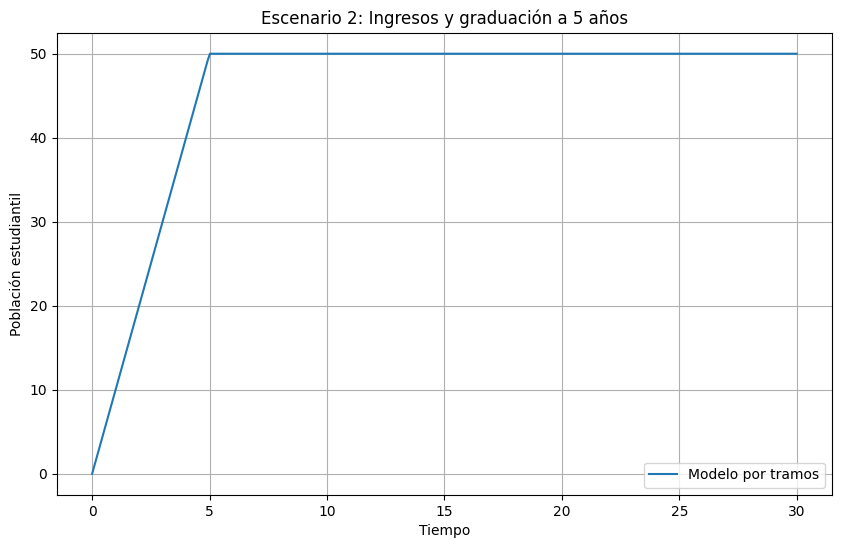

In [4]:
# =========================
# Escenario 2: Ingresos y graduación fija a los 5 años
# =========================
def poblacion_tramos(t, r):
    if t < 5:
        return r * t
    else:
        return 5 * r

r = 10
x2 = [poblacion_tramos(ti, r) for ti in t]

plt.figure(figsize=(10,6))
plt.plot(t, x2, label="Modelo por tramos")
plt.title("Escenario 2: Ingresos y graduación a 5 años")
plt.xlabel("Tiempo")
plt.ylabel("Población estudiantil")
plt.legend()
plt.grid(True)
plt.show()

### Cálculo de la función por tramos (Escenario 2)

En este escenario, los estudiantes ingresan a razón constante de \( r \) estudiantes por año y permanecen en la universidad exactamente 5 años. Supondremos que la población acumulada crece linealmente hasta que los primeros estudiantes comienzan a graduarse.

Podemos modelar esta situación con una función por tramos:

$$
x(t) =
\begin{cases}
r \cdot t, & 0 \leq t < 5 \\
5r, & t \geq 5
\end{cases}
$$

Esto significa que:

- Durante los primeros 5 años, nadie se gradúa, por lo que la población crece linealmente.
- A partir del quinto año, cada año se gradúa la misma cantidad que ingresa, manteniendo una población constante.


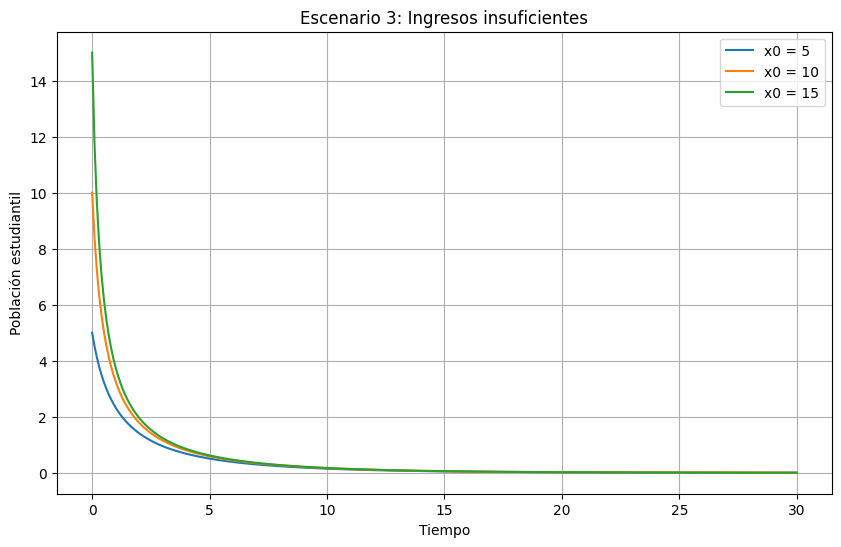

In [5]:
# =========================
# Escenario 3: Ingresos menores que deserción
# =========================
def modelo_logistico_descenso(x, t, a, b):
    return a * x - b * x**2

a_desc = -0.2
x0 = [5, 10, 15]

plt.figure(figsize=(10,6))
for xi in x0:
    sol = odeint(modelo_logistico_descenso, xi, t, args=(a_desc, b))
    plt.plot(t, sol, label=f"x0 = {xi}")

plt.title("Escenario 3: Ingresos insuficientes")
plt.xlabel("Tiempo")
plt.ylabel("Población estudiantil")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# =========================
# Parte técnica común
# =========================
x, t_sym = sp.symbols('x t')
dxdt = a * x - b * x**2
sol = sp.dsolve(sp.Derivative(x, t_sym) - dxdt, x)
sp.pprint(sol)


ValueError: dsolve() and classify_ode() only work with functions of one variable, not x